In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('wine.csv')
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [87]:
# Перевірка пропущених значень та їх обробка
missing_values = dataset.isnull().sum()
dataset = dataset.dropna()
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [88]:
# Перевірка некоректних значень та викидів

# Вибір числових колонок
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']

# Перевірка некоректних значень
invalid_values = dataset[numeric_columns].lt(0).any(axis=1)
invalid_records = dataset[invalid_values]

if len(invalid_records) > 0:
    print("Знайдені некоректні значення:")
    print(invalid_records)
else:
    print("Некоректні значення відсутні.")

Некоректні значення відсутні.


In [89]:
# Викиди
Q1 = dataset[numeric_columns].quantile(0.25)
Q3 = dataset[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((dataset[numeric_columns] < (Q1 - 1.5 * IQR)) | (dataset[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_records = dataset[outliers]

if len(outliers_records) > 0:
    print("Знайдені викиди:")
    print(outliers_records)
else:
    print("Викиди відсутні.")

Знайдені викиди:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
...             ...               ...          ...             ...        ...   
1570            6.4             0.360         0.53             2.2      0.230   
1571            6.4             0.380         0.14             2.2      0.038   
1574            5.6             0.310         0.78            13.9      0.074   
1577            6.2             0.700         0.15             5.1      0.076   
1589            6.6             0.725         0.20             7.8      0.073   

      free

In [90]:
# Нормалізація або стандартизація числових змінних
scaler = StandardScaler()
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

# Кодування вихідної змінної
label_encoder = LabelEncoder()
dataset['quality'] = label_encoder.fit_transform(dataset['quality'])

In [91]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,0
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,1
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,1
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,0


In [92]:
# Розділення датасету на вхідні змінні та вихідну змінну
X = dataset.drop('quality', axis=1)
y = dataset['quality']

# Розділення датасету на тренувальний та тестувальний набори даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Створення та навчання моделі логістичної регресії
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = log_reg.predict(X_test)

In [94]:
# Оцінка результатів
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[105  36]
 [ 47 132]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.72       141
           1       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



Decisions tree

In [95]:
# Створення та навчання моделі дерева рішень
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = dec_tree.predict(X_test)

In [96]:
# Оцінка результатів
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102  39]
 [ 43 136]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       141
           1       0.78      0.76      0.77       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



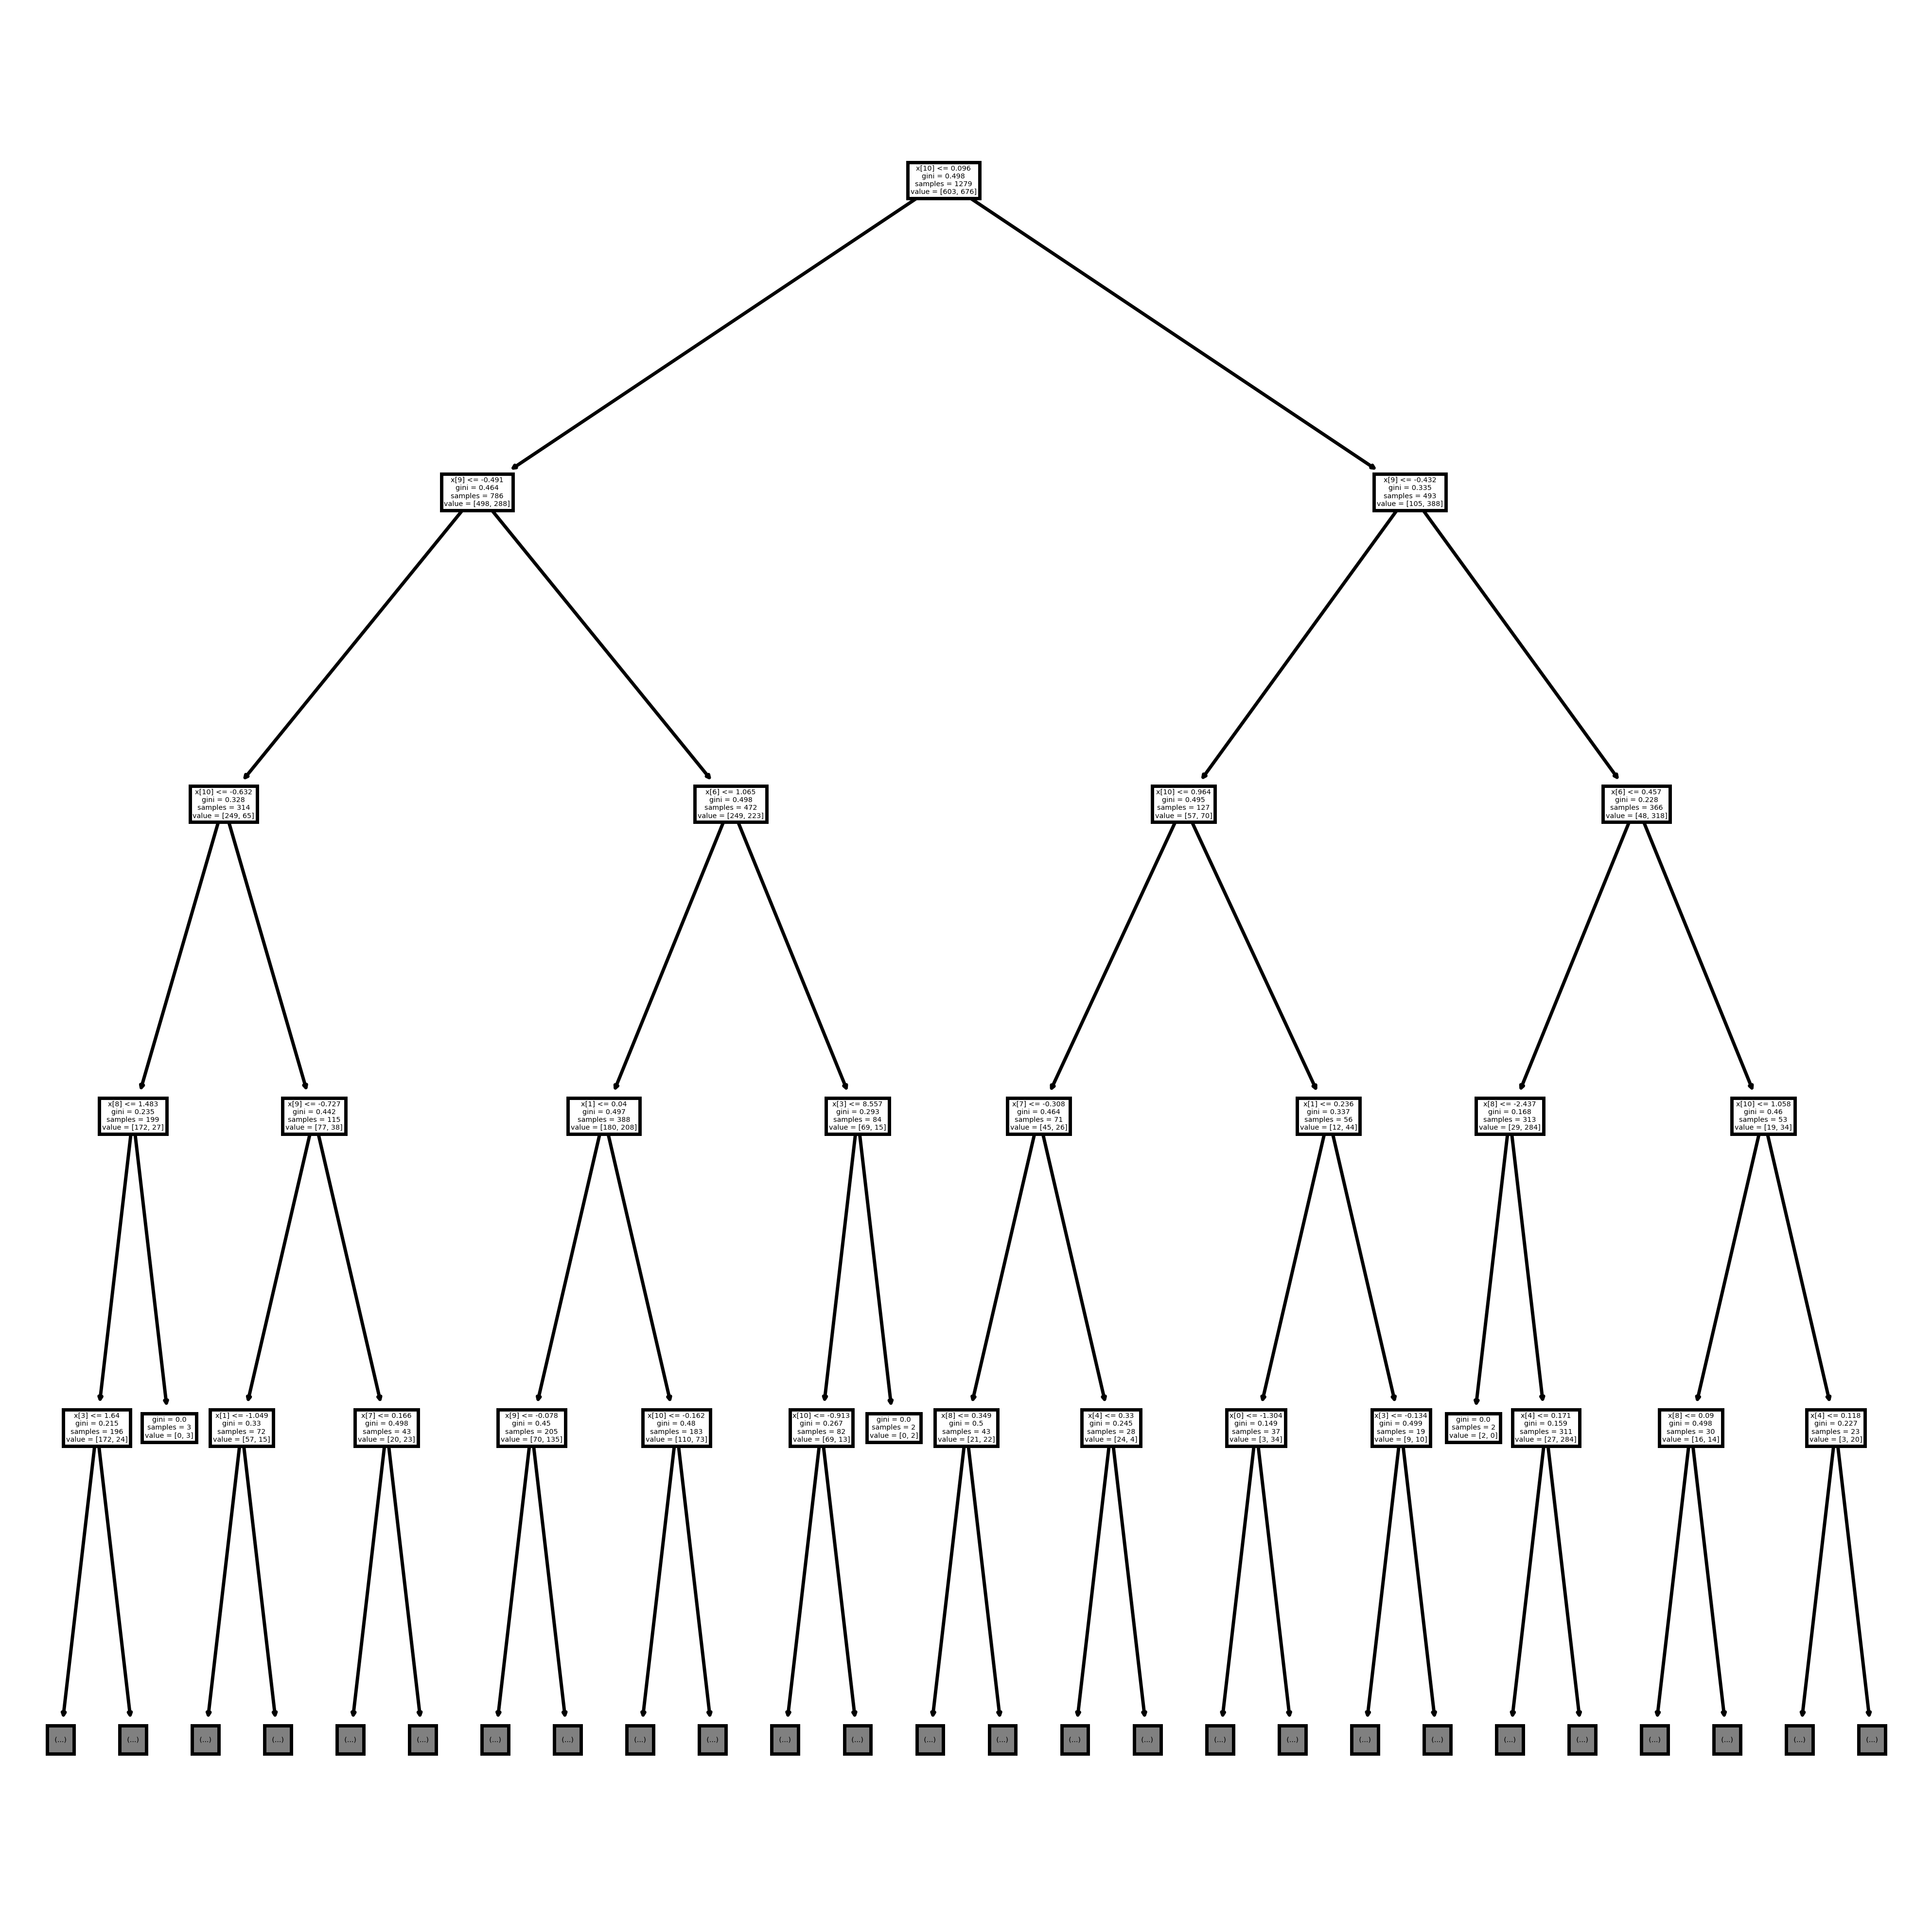

In [97]:
# Візуалізація дерева рішень
fig, ax = plt.subplots(figsize=(10, 10), dpi=500)
tree.plot_tree(dec_tree, ax=ax, max_depth=4)
plt.show()